## Magnitude of the Gradient

With the result of Last notebook, we saw that we were able to identify lanes but there is still room for improvement. If you play around with the thresholds a bit, you'll find the x-gradient does a cleaner job of picking up the lane lines, but you can see the lines in the y-gradient as well. 

<br/>
In this notebook, your goal is to apply a threshold to the overall magnitude of the gradient, in both x and y.

The magnitude, or absolute value, of the gradient is just the square root of the squares of the individual x and y gradients. For a gradient in both the x and y directions, the magnitude is the square root of the sum of the squares.
<br/>

abs_sobelx = $\sqrt{(sobel_x)^2}$ <br/>
abs_sobely = $\sqrt{(sobel_y)^2}$ <br/>
abs_sobelxy = $\sqrt{(sobel_x)^2 +sobel_y)^2 }$ <br/>


It's also worth considering the size of the region in the image over which you'll be taking the gradient. You can modify the kernel size for the Sobel operator to change the size of this region. Taking the gradient over larger regions can smooth over noisy intensity fluctuations on small scales. The default Sobel kernel size is 3, but here you'll define a new function that takes kernel size as a parameter.

It's important to note here that the kernel size should be an odd number. Since we are searching for the gradient around a given pixel, we want to have an equal number of pixels in each direction of the region from this central pixel, leading to an odd-numbered filter size - a filter of size three has the central pixel with one additional pixel in each direction, while a filter of size five has an additional two pixels outward from the central pixel in each direction.

The function you'll define for the exercise below should take in an image and optional Sobel kernel size, as well as thresholds for gradient magnitude. Next, you'll compute the gradient magnitude, apply a threshold, and create a binary output image showing where thresholds were met. 
<br/>

Lets get to it then

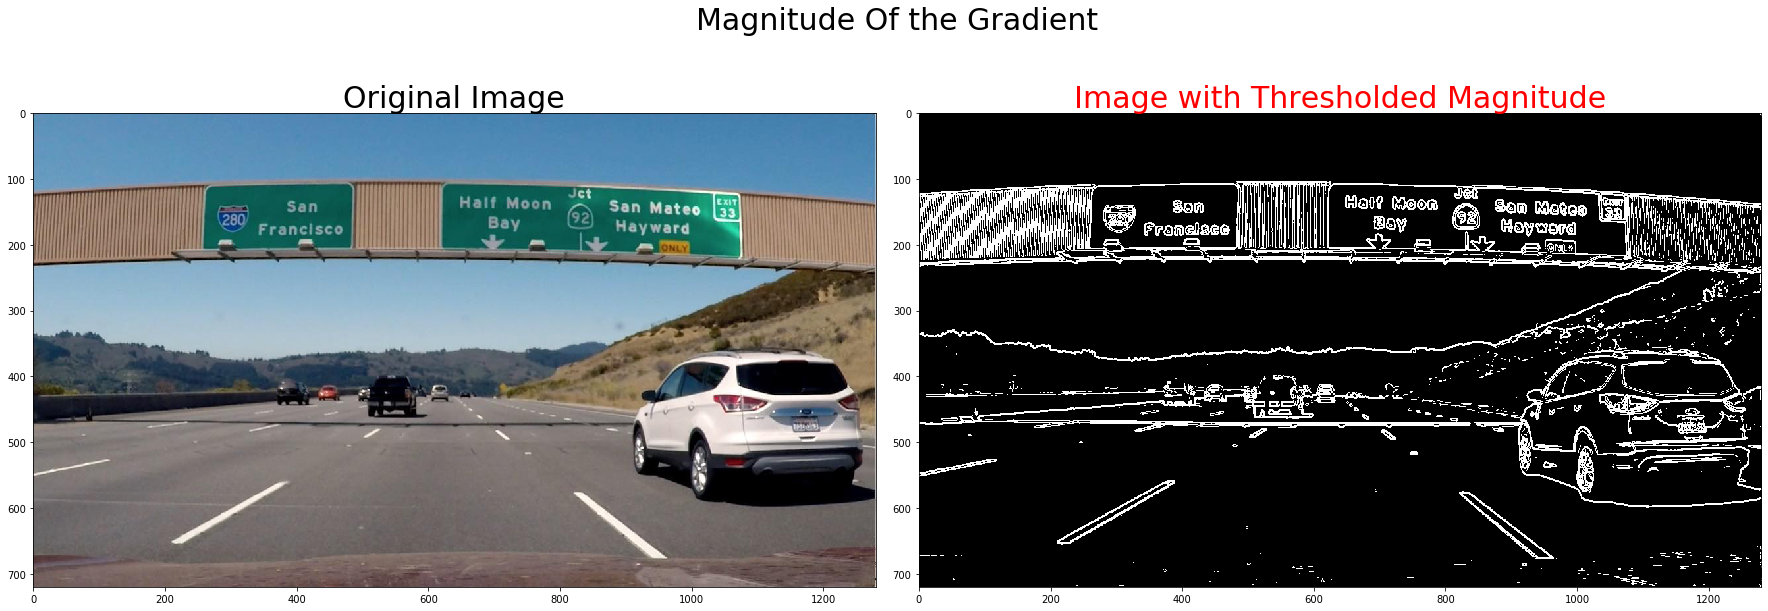

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image and grayscale it
image = mpimg.imread('./img/signs_vehicles_xygrad.png')


# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Take x and y gradients separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F,1,0, ksize =sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F,0,1, ksize =sobel_kernel)
    
    # Calculate the magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(gradmag)/255
    gradmag = (gradmag/scale_factor).astype(np.uint8)
    
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1
    
    return binary_output

mag_binary = mag_thresh(image, sobel_kernel= 3, mag_thresh=(30,155))

f,(ax1,ax2) = plt.subplots(1,2,figsize=(24,9))
f.suptitle('Magnitude Of the Gradient', fontsize = 30)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize = 30)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Image with Thresholded Magnitude', fontsize= 30, color = 'r')
plt.subplots_adjust(left=0, right= 1, top= 0.9, bottom=0.)